# Notebook Title

## Setup Python and R environment
you can ignore this section

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


## Load & Clean Data

👉 Load the data along with the census connectors below (the output of the `connect-to-census.ipynb` notebook) and do any cleanup you'd like to do.

In [13]:
df=pd.read_csv('privateschools_with_geocodes.csv')
df

,X,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,STFIP,...,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,County
0,-86.541877,32.472090,1,2722,AUTAUGA ACADEMY,497 GOLSON RD,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1069,1030,2021-2022,1.001020e+09,Autauga County
1,-86.458475,32.469350,2,A0100060,CAMELLIA BAPTIST WEM,201 WOODVALE RD,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001021e+09,Autauga County
2,-86.472061,32.460800,3,A0900032,FIRST PRESBYTERIAN KINDERGARTEN,211 S CHESTNUT ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
3,-86.466175,32.455425,4,A1592005,NEW HOPE ACADEMY,301 WATER ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.001020e+09,Autauga County
4,-86.470441,32.461710,5,K9300030,FIRST BAPTIST PRESCHOOL AND KINDERGARTEN,138 S WASHINGTON ST,PRATTVILLE,AL,36067,1,...,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1088,1030,2021-2022,1.003011e+09,Baldwin County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,-110.810241,43.491060,22341,A0303404,MOUNTAIN ACADEMY OF TETON SCIENCE SCHOOLS,700 COYOTE CANYON RD,JACKSON,WY,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County
22341,-110.799526,43.458650,22342,A0903887,JACKSON HOLE COMMUNITY SCHOOL,"1715 HIGH SCHOOL ROAD, #240",JACKSON,WY,83001,56,...,N,N,N,N,5600,56016,56017,2021-2022,5.603997e+10,Teton County
22342,-110.844286,43.367002,22343,A1102418,RED TOP MEADOWS,7905 FALL CREEK RD,WILSON,WY,83014,56,...,N,N,N,N,5600,56022,56016,2021-2022,5.603997e+10,Teton County
22343,-110.810901,43.441910,22344,A2000010,JACKSON HOLE CLASSICAL ACADEMY,2500 S PARK LOOP RD,JACKSON,WY,83001,56,...,N,N,N,N,5600,56023,56017,2021-2022,5.603997e+10,Teton County


## 👉 Grab Census Data

1. loading the Census API key

In [4]:
import dotenv
dotenv.load_dotenv()


True

In [5]:
%%R 

require('tidycensus')

# because it an environment variable, we don't have to 
# explicitly pass this string to R, it is readable here
# in this R cell.
census_api_key(Sys.getenv("CENSUS_API_KEY"))

Loading required package: tidycensus
To install your API key for use in future sessions, run this function with `install = TRUE`.


2. Decide which Census variables you want

    Use <https://censusreporter.org/> to figure out which tables you want. (if censusreporter is down, check out the code in the cell below)

    -   Scroll to the bottom of the page to see the tables.
    -   If you already know the table ID, stick that in the "Explore" section to learn more about that table.

    By default this code loads (B01003_001) which we found in censusreporter here: https://censusreporter.org/tables/B01003/

    - find some other variables that you're also interested in
    - don't forget to pick a geography like "tract", "county" or "block group". here is the list of [all geographies](https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus
    ).


## New census model. Adding population density and college enrollment 

In [90]:
%%R

library(tidycensus)

census_data <- get_acs(
  geography = "county", 
  variables = c(
      bachelors_education = "B14001_008",
      masters_education = "B14001_009"
  ), 
  year = 2022,
  survey = "acs5",
  output="wide",
)

census_data

# A tibble: 3,222 × 6
   GEOID NAME       bachelors_educationE bachelors_educationM masters_educationE
   <chr> <chr>                     <dbl>                <dbl>              <dbl>
 1 01001 Autauga C…                 2430                  431                400
 2 01003 Baldwin C…                 7417                 1020               1248
 3 01005 Barbour C…                  841                  196                177
 4 01007 Bibb Coun…                  461                  193                 98
 5 01009 Blount Co…                 1754                  326                326
 6 01011 Bullock C…                  414                  228                 19
 7 01013 Butler Co…                  624                  160                 57
 8 01015 Calhoun C…                 7125                  622                821
 9 01017 Chambers …                 1362                  259                189
10 01019 Cherokee …                  934                  213                182
# ℹ 3,

Getting data from the 2018-2022 5-year ACS


In [ ]:
%%R

library(tidycensus)

census_data <- get_acs(
  geography = "county",
  variables = c(
      bachelors_education = "B14001_008",
      masters_education = "B14001_009"
  ),
  year = 2022,
  survey = "acs5",
  output="wide",
  geometry = FALSE
)
cenesus_data %>% head()

In [21]:
%%R

library(tidycensus)

census_data <- get_acs(
  geography = "county", 
  variables = c(
    bachelors_education = "B14001_008",
    masters_education = "B14001_009"  # note: probably meant to use a different code here
  ), 
  year = 2022,
  survey = "acs5",
  output = "wide",
  geometry = TRUE  # this adds the spatial data
)

census_data

Simple feature collection with 3222 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -179.1467 ymin: 17.88328 xmax: 179.7785 ymax: 71.38782
Geodetic CRS:  NAD83
First 10 features:
   GEOID                           NAME bachelors_educationE
1  01069        Houston County, Alabama                 4205
2  01023        Choctaw County, Alabama                  540
3  01005        Barbour County, Alabama                  841
4  01107        Pickens County, Alabama                  879
5  01033        Colbert County, Alabama                 1665
6  04012         La Paz County, Arizona                  366
7  04001         Apache County, Arizona                 2693
8  05081  Little River County, Arkansas                  152
9  05121      Randolph County, Arkansas                  411
10 06037 Los Angeles County, California               644395
   bachelors_educationM masters_educationE masters_educationM
1                   299                987     

Getting data from the 2018-2022 5-year ACS


In [22]:
%%R 
write.csv(census_data, "census_data_11.csv", row.names = FALSE)

In [17]:
import pandas as pd 

df=pd.read_csv("census_data_10.csv")
df

,GEOID,NAME,bachelors_educationE,bachelors_educationM,masters_educationE,masters_educationM
0,1001,"Autauga County, Alabama",2430,431,400,146
1,1003,"Baldwin County, Alabama",7417,1020,1248,323
2,1005,"Barbour County, Alabama",841,196,177,103
3,1007,"Bibb County, Alabama",461,193,98,118
4,1009,"Blount County, Alabama",1754,326,326,115
...,...,...,...,...,...,...
3217,72145,"Vega Baja Municipio, Puerto Rico",3055,415,420,185
3218,72147,"Vieques Municipio, Puerto Rico",162,191,0,21
3219,72149,"Villalba Municipio, Puerto Rico",1226,225,282,136
3220,72151,"Yabucoa Municipio, Puerto Rico",1593,274,182,112


In [18]:
df_education = df.copy()
df_education[['County', 'State']] = df_education['NAME'].str.split(',', expand=True)

df_education['County'] = df_education['County'].str.strip()
df_education['State'] = df_education['State'].str.strip()

df_education = df_education.drop(columns=['NAME'])

df_education

,GEOID,bachelors_educationE,bachelors_educationM,masters_educationE,masters_educationM,County,State
0,1001,2430,431,400,146,Autauga County,Alabama
1,1003,7417,1020,1248,323,Baldwin County,Alabama
2,1005,841,196,177,103,Barbour County,Alabama
3,1007,461,193,98,118,Bibb County,Alabama
4,1009,1754,326,326,115,Blount County,Alabama
...,...,...,...,...,...,...,...
3217,72145,3055,415,420,185,Vega Baja Municipio,Puerto Rico
3218,72147,162,191,0,21,Vieques Municipio,Puerto Rico
3219,72149,1226,225,282,136,Villalba Municipio,Puerto Rico
3220,72151,1593,274,182,112,Yabucoa Municipio,Puerto Rico


In [20]:
df_education.to_csv('education.csv')

## Adding more census variables

In [75]:
%%R

library(tidycensus)

census_data <- get_acs(
  geography = "county", 
  variables = c(
    total_pop = "B02001_001",
    white = "B02001_002",
    black = "B02001_003",
    native_american = "B02001_004",
    asian = "B02001_005",
    pacific_islander = "B02001_006",
    other_race = "B02001_007",
    two_or_more = "B02001_008",
    med_inc = "B19013_001",
    hispanic = "B03003_003",
    poverty_income = "B17001_002",
    poverty_total = "B17001_001"
  ), 
  year = 2022,
  survey = "acs5",
  output="wide"
)

census_data

# A tibble: 3,222 × 26
   GEOID NAME                  total_popE total_popM whiteE whiteM blackE blackM
   <chr> <chr>                      <dbl>      <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
 1 01001 Autauga County, Alab…      58761         NA  43747    345  11496    525
 2 01003 Baldwin County, Alab…     233420         NA 195998   1247  19445    746
 3 01005 Barbour County, Alab…      24877         NA  11309    221  11668    220
 4 01007 Bibb County, Alabama       22251         NA  16872    225   4603    294
 5 01009 Blount County, Alaba…      59077         NA  53941    683    729    196
 6 01011 Bullock County, Alab…      10328         NA   2397    227   7117     88
 7 01013 Butler County, Alaba…      18981         NA   9777     76   8462     68
 8 01015 Calhoun County, Alab…     116162         NA  83306    575  25631    449
 9 01017 Chambers County, Ala…      34612         NA  19642    122  14114    154
10 01019 Cherokee County, Ala…      25069         NA  22884    129   1008    144
# ℹ 3

Getting data from the 2018-2022 5-year ACS


In [76]:
%%R 
write.csv(census_data, "census_data_8.csv", row.names = FALSE)

In [81]:
import pandas as pd 
df=pd.read_csv('census_data_8.csv')
df

,GEOID,NAME,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,...,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM
0,1001,"Autauga County, Alabama",58761,NaN,43747,345,11496,525,59,71,...,2480,668,68315.0,4941.0,1864,NaN,6630,1081,58291,87
1,1003,"Baldwin County, Alabama",233420,NaN,195998,1247,19445,746,848,325,...,10638,1169,71039.0,2374.0,11210,NaN,23445,2134,229539,273
2,1005,"Barbour County, Alabama",24877,NaN,11309,221,11668,220,74,39,...,609,215,39712.0,3289.0,1202,NaN,5280,582,21851,109
3,1007,"Bibb County, Alabama",22251,NaN,16872,225,4603,294,21,25,...,578,321,50669.0,8260.0,650,NaN,4297,751,20836,283
4,1009,"Blount County, Alabama",59077,NaN,53941,683,729,196,227,157,...,2104,434,57440.0,3308.0,5721,NaN,8277,964,58399,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,72145,"Vega Baja Municipio, Puerto Rico",54182,NaN,21954,1708,2444,629,0,35,...,19964,1681,23701.0,1606.0,53023,318.0,23265,1386,53847,149
3218,72147,"Vieques Municipio, Puerto Rico",8199,NaN,1813,622,579,362,0,21,...,557,359,17062.0,999.0,7744,286.0,4433,732,8199,21
3219,72149,"Villalba Municipio, Puerto Rico",21984,NaN,8732,1041,1889,553,16,25,...,8479,1140,22461.0,3326.0,21905,62.0,9342,984,21858,69
3220,72151,"Yabucoa Municipio, Puerto Rico",30313,NaN,2393,494,11349,1294,0,31,...,968,393,19972.0,1975.0,30252,59.0,15070,1007,30293,5


In [82]:
new_df = df.copy()
new_df[['county', 'state']] = new_df['NAME'].str.split(',', expand=True)

new_df['county'] = new_df['county'].str.strip()
new_df['state'] = new_df['state'].str.strip()

new_df = new_df.drop(columns=['NAME'])

new_df

,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,asianE,...,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,county,state
0,1001,58761,NaN,43747,345,11496,525,59,71,658,...,68315.0,4941.0,1864,NaN,6630,1081,58291,87,Autauga County,Alabama
1,1003,233420,NaN,195998,1247,19445,746,848,325,2046,...,71039.0,2374.0,11210,NaN,23445,2134,229539,273,Baldwin County,Alabama
2,1005,24877,NaN,11309,221,11668,220,74,39,126,...,39712.0,3289.0,1202,NaN,5280,582,21851,109,Barbour County,Alabama
3,1007,22251,NaN,16872,225,4603,294,21,25,69,...,50669.0,8260.0,650,NaN,4297,751,20836,283,Bibb County,Alabama
4,1009,59077,NaN,53941,683,729,196,227,157,100,...,57440.0,3308.0,5721,NaN,8277,964,58399,114,Blount County,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,72145,54182,NaN,21954,1708,2444,629,0,35,9,...,23701.0,1606.0,53023,318.0,23265,1386,53847,149,Vega Baja Municipio,Puerto Rico
3218,72147,8199,NaN,1813,622,579,362,0,21,16,...,17062.0,999.0,7744,286.0,4433,732,8199,21,Vieques Municipio,Puerto Rico
3219,72149,21984,NaN,8732,1041,1889,553,16,25,0,...,22461.0,3326.0,21905,62.0,9342,984,21858,69,Villalba Municipio,Puerto Rico
3220,72151,30313,NaN,2393,494,11349,1294,0,31,10,...,19972.0,1975.0,30252,59.0,15070,1007,30293,5,Yabucoa Municipio,Puerto Rico


In [83]:
new_df[new_df['county']=='Yuma County']

,GEOID,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,asianE,...,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,county,state
111,4027,204374,NaN,118769,2691,3969,688,2662,451,2254,...,56439.0,1344.0,133381,NaN,34654,2643,197646,386,Yuma County,Arizona
308,8125,9938,NaN,8333,374,17,34,117,73,25,...,60118.0,7842.0,2552,NaN,1355,385,9652,125,Yuma County,Colorado


## Median income per state! I need this to accruately measure which county is low income. 

In [19]:
%%R

library(tidycensus)

census_data_1 <- get_acs(
  geography = "state", 
  variables = c(
    med_inc = "B19013_001"
  ), 
  year = 2022,
  survey = "acs5",
  output="wide"
)

census_data_1

# A tibble: 52 × 4
   GEOID NAME                 med_incE med_incM
   <chr> <chr>                   <dbl>    <dbl>
 1 01    Alabama                 59609      377
 2 02    Alaska                  86370     1083
 3 04    Arizona                 72581      450
 4 05    Arkansas                56335      422
 5 06    California              91905      277
 6 08    Colorado                87598      508
 7 09    Connecticut             90213      730
 8 10    Delaware                79325     1227
 9 11    District of Columbia   101722     1569
10 12    Florida                 67917      259
# ℹ 42 more rows
# ℹ Use `print(n = ...)` to see more rows


Getting data from the 2018-2022 5-year ACS


In [20]:
%%R 
write.csv(census_data_1, "census_data_9.csv", row.names = FALSE)

In [21]:
import pandas as pd 
df=pd.read_csv('census_data_9.csv')
df

,GEOID,NAME,med_incE,med_incM
0,1,Alabama,59609,377
1,2,Alaska,86370,1083
2,4,Arizona,72581,450
3,5,Arkansas,56335,422
4,6,California,91905,277
5,8,Colorado,87598,508
6,9,Connecticut,90213,730
7,10,Delaware,79325,1227
8,11,District of Columbia,101722,1569
9,12,Florida,67917,259


In [22]:
df = df.drop('med_incM', axis=1) 
df

,GEOID,NAME,med_incE
0,1,Alabama,59609
1,2,Alaska,86370
2,4,Arizona,72581
3,5,Arkansas,56335
4,6,California,91905
5,8,Colorado,87598
6,9,Connecticut,90213
7,10,Delaware,79325
8,11,District of Columbia,101722
9,12,Florida,67917


In [23]:
df = df.rename(columns={'STATE':'State'})
df

,GEOID,NAME,med_incE
0,1,Alabama,59609
1,2,Alaska,86370
2,4,Arizona,72581
3,5,Arkansas,56335
4,6,California,91905
5,8,Colorado,87598
6,9,Connecticut,90213
7,10,Delaware,79325
8,11,District of Columbia,101722
9,12,Florida,67917


In [24]:
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}
df['STATE'] = df['State'].map(state_abbrev)
df

KeyError: 'State'

In [25]:
df = df.rename(columns={'med_incE':'med_inc_state'})
df

,GEOID,NAME,med_inc_state
0,1,Alabama,59609
1,2,Alaska,86370
2,4,Arizona,72581
3,5,Arkansas,56335
4,6,California,91905
5,8,Colorado,87598
6,9,Connecticut,90213
7,10,Delaware,79325
8,11,District of Columbia,101722
9,12,Florida,67917


In [ ]:
df.to_csv('median_income_per_state_1')

## Remove the comma after the county name 

In [3]:
import pandas as pd

df=pd.read_csv('census_data_9.csv')
df

,GEOID,NAME,med_incE,med_incM
0,1,Alabama,59609,377
1,2,Alaska,86370,1083
2,4,Arizona,72581,450
3,5,Arkansas,56335,422
4,6,California,91905,277
5,8,Colorado,87598,508
6,9,Connecticut,90213,730
7,10,Delaware,79325,1227
8,11,District of Columbia,101722,1569
9,12,Florida,67917,259


In [5]:
df = df.rename(columns={'County': 'State'})
df

,GEOID,State,med_incE,med_incM
0,1,Alabama,59609,377
1,2,Alaska,86370,1083
2,4,Arizona,72581,450
3,5,Arkansas,56335,422
4,6,California,91905,277
5,8,Colorado,87598,508
6,9,Connecticut,90213,730
7,10,Delaware,79325,1227
8,11,District of Columbia,101722,1569
9,12,Florida,67917,259


In [9]:
df

,GEOID,State,med_incE
0,1,Alabama,59609
1,2,Alaska,86370
2,4,Arizona,72581
3,5,Arkansas,56335
4,6,California,91905
5,8,Colorado,87598
6,9,Connecticut,90213
7,10,Delaware,79325
8,11,District of Columbia,101722
9,12,Florida,67917


In [10]:
df.to_csv("census_data_9_1.csv", index=False)

## 👉 Merge it with your data

hint...`tidycensus` provides you data in long format you may need to pivot the census data from long to wide format before merging it with your data

In [87]:
%%R 
unique_names <- !duplicated(total_2$NAME)
total_unique <- total_2[unique_names, ]

In [88]:
%%R 

write.csv(total_unique, "4.17.csv", row.names = FALSE)

In [90]:
import pandas as pd

df=pd.read_csv("4.17.csv")
df

,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,CITY,STATE,ZIP,...,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM
0,Abbeville County,-81.724593,33.561372,18074,1264754,MEAD HALL EPISCOPAL SCHOOL,129 PENDLETON ST SW,AIKEN,SC,29801,...,840,204,49759,4901,441,NaN,3752,544,23589,21
1,Abbeville County,-82.401851,34.234799,18071,1265102,COLD SPRINGS MENNONITE SCHOOL,168 COLD SPRINGS CHURCH RD,ABBEVILLE,SC,29620,...,840,204,49759,4901,441,NaN,3752,544,23589,21
2,Acadia Parish,-92.369765,30.225854,8801,2028727,NORTHSIDE CHRISTIAN SCHOOL,809 E NORTHERN AVE,CROWLEY,LA,70526,...,2433,586,44977,2841,1780,NaN,13459,1475,56735,141
3,Acadia Parish,-92.492455,30.318103,8799,539857,ST FRANCIS SCHOOL,490 SAINT JOSEPH AVE,IOTA,LA,70543,...,2433,586,44977,2841,1780,NaN,13459,1475,56735,141
4,Acadia Parish,-92.215586,30.407770,8797,539744,OUR MOTHER OF PEACE ELEMENTARY,218 N ROGERS ST,CHURCH POINT,LA,70525,...,2433,586,44977,2841,1780,NaN,13459,1475,56735,141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17575,Yuma County,-112.024890,34.741368,598,A2100207,RISE RESOURCE CENTER,301 N WILLARD ST,COTTONWOOD,AZ,86326,...,1201,391,60118,7842,2552,NaN,1355,385,9652,125
17576,Yuma County,-112.470961,34.593290,600,BB200014,PRESCOTT ADVENTIST CHRISTIAN SCHOOL,2980 WILLOW CREEK RD,PRESCOTT,AZ,86301,...,1201,391,60118,7842,2552,NaN,1355,385,9652,125
17577,Yuma County,-114.644921,32.677850,605,A0300076,YUMA CATHOLIC HIGH SCHOOL,2100 W 28TH ST,YUMA,AZ,85364,...,1201,391,60118,7842,2552,NaN,1355,385,9652,125
17578,Yuma County,-114.626541,32.697090,606,A1700088,YUMA ADVENTIST CHRISTIAN SCHOOL,1681 S 6TH AVE,YUMA,AZ,85364,...,1201,391,60118,7842,2552,NaN,1355,385,9652,125


In [128]:
%%R 

write.csv(total_unique, "4.17_with_statemedian_income_1.csv", row.names = FALSE)

In [64]:
import pandas as pd

df=pd.read_csv("4.17_with_statemedian_income_1.csv")
df

,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,CITY,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,X.y,GEOID.y,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,asianE,asianM,pacific_islanderE,pacific_islanderM,other_raceE,other_raceM,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM
0,AK,1,2,86370,Anchorage Municipality,-149.827491,61.109600,279,1604012,ST ELIZABETH ANN SETON SCHOOL,2901 HUFFMAN RD,ANCHORAGE,99516,2,2020,Anchorage Municipality,11,61.109600,-149.827491,11260,"Anchorage, AK",1,N,N,N,N,200,2026,0200M,2021-2022,2020002501,69,2020,290674,NaN,172004,1355,15469,820,21507,1067,28440,1050,8563,433,7728,1290,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399
1,AK,1,2,86370,Fairbanks North Star Borough,-147.821831,64.874143,294,2001589,GOLDEN HEART CHRISTIAN SCHOOL,1811 FARMERS LOOP RD,FAIRBANKS,99709,2,2090,Fairbanks North Star Borough,41,64.874143,-147.821831,21820,"Fairbanks, AK",1,N,N,N,N,200,2004,0200B,2021-2022,2090001300,76,2090,96299,NaN,68726,733,3979,446,6733,837,3032,313,653,25,1672,514,11504,1216,81655,4690,8038,NaN,6356,768,92321,221
2,AK,1,2,86370,Bristol Bay Borough,-149.955792,61.147173,289,A9900095,LUMEN CHRISTI HIGH SCHOOL,8110D JEWEL LAKE RD,ANCHORAGE,99502,2,2020,Anchorage Municipality,11,61.147173,-149.955792,11260,"Anchorage, AK",1,N,N,N,N,200,2022,0200K,2021-2022,2060000100,71,2060,854,87.0,387,69,3,4,269,50,48,42,17,17,22,36,108,38,94167,12682,74,41.0,66,84,837,85
3,AK,1,2,86370,Juneau City and Borough,-134.492231,58.347410,300,24021,JUNEAU SDA CHRISTIAN SCHOOL,4890 GLACIER HWY,JUNEAU,99801,2,2110,Juneau City and Borough,41,58.347410,-134.492231,27940,"Juneau, AK",2,N,N,N,N,200,2033,0200Q,2021-2022,2110000400,79,2110,32108,NaN,20543,297,345,125,3018,372,2317,220,437,13,620,296,4828,450,95711,6801,2300,NaN,2176,449,31517,144
4,AK,1,2,86370,Anchorage Municipality,-149.835645,61.133373,288,A9700068,PACIFIC NORTHERN ACADEMY,2511 SENTRY DR,ANCHORAGE,99507,2,2020,Anchorage Municipality,11,61.133373,-149.835645,11260,"Anchorage, AK",1,N,N,N,N,200,2026,0200M,2021-2022,2020002811,69,2020,290674,NaN,172004,1355,15469,820,21507,1067,28440,1050,8563,433,7728,1290,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,WY,50,56,72495,Natrona County,-104.824531,41.173650,22330,K9500628,MONTESSORI SCHOOL OF CHEYENNE,5926 TOWNSEND PL,CHEYENNE,82009,56,56021,Laramie County,13,41.173650,-104.824531,16940,"Cheyenne, WY",1,N,N,N,N,5600,56008,56005,2021-2022,56025000602,3133,56025,79506,NaN,72388,613,313,140,813,213,421,138,126,158,1291,408,4154,553,69104,3149,7263,NaN,7120,903,78006,179
17524,WY,50,56,72495,Wood County,-104.816681,41.174450,22328,1548521,LAURA E MASON CHRISTIAN ACADEMY,723 STOREY BLVD,CHEYENNE,82009,56,56021,Laramie County,13,41.174450,-104.816681,16940,"Cheyenne, WY",1,N,N,N,N,5600,56007,56004,2021-2022,55141010500,2131,39173,131564,NaN,117113,515,2660,330,268,72,2547,197,165,109,1794,378,7017,642,70537,2274,7862,NaN,16241,1421,125680,262
17525,WY,50,56,72495,Sweetwater County,-109.456931,41.507840,22340,A1703875,GREEN RIVER CHRISTIAN ACADEMY,800 HOMESTEAD DR,GREEN RIVER,82935,56,56037,Sweetwater County,33,41.507840,-109.456931,40540,"Rock Springs, WY",2,N,N,N,N,5600,56060,56013,2021-2022,56037970601,3139,56037,42079,NaN,35680,652,528,131,415,156,361,125,48,46,1828,548,3219,521,79375,4715,6820,NaN,4833,785,41468,108
17526,WY,50,56,72495,Teton County,-110.812671,43.459650,22345,A9301070,JACKSON HOLE CHRISTIAN ACADEMY,1450 S PARK LOOP RD,JACKSON,83001,56,56039,Teton County,33,43.459650,-110.812671,27220,"Jackson, WY-ID",2,N,N,N,N,5600,56016,56017,2021-2022,56039967

In [30]:
df.dtypes

STATE                 object
X                      int64
GEOID.x                int64
med_inc_state          int64
County                object
X.x                  float64
Y                    float64
OBJECTID               int64
PPIN                  object
NAME                  object
STREET                object
CITY                  object
ZIP                    int64
STFIP                  int64
CNTY                   int64
NMCNTY                object
LOCALE                 int64
LAT                  float64
LON                  float64
CBSA                  object
NMCBSA                object
CBSATYPE              object
CSA                   object
NMCSA                 object
NECTA                 object
NMNECTA               object
CD                     int64
SLDL                  object
SLDU                  object
SCHOOLYEAR            object
Census_Tract           int64
X.y                    int64
GEOID.y                int64
total_popE             int64
total_popM    

## Establish my y as number of schools per capita. First I need a column for number or count of schools per county.

In [31]:
counts = df.groupby(['STATE', 'County'])['NAME'].count().reset_index()
counts.rename(columns={'NAME': 'number_of_schools'}, inplace=True)
counts

,STATE,County,number_of_schools
0,AK,Anchorage Municipality,13
1,AK,Bristol Bay Borough,1
2,AK,Dillingham Census Area,1
3,AK,Fairbanks North Star Borough,6
4,AK,Juneau City and Borough,2
...,...,...,...
1906,WY,Natrona County,6
1907,WY,Sheridan County,1
1908,WY,Sweetwater County,1
1909,WY,Teton County,5


In [32]:
df = df.merge(counts, on=['STATE', 'County'], how='left')
df

,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,...,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools
0,AK,1,2,86370,Anchorage Municipality,-149.827491,61.109600,279,1604012,ST ELIZABETH ANN SETON SCHOOL,...,2107,95731,2829,28162,NaN,27415,2611,284386,399,13
1,AK,1,2,86370,Fairbanks North Star Borough,-147.821831,64.874143,294,2001589,GOLDEN HEART CHRISTIAN SCHOOL,...,1216,81655,4690,8038,NaN,6356,768,92321,221,6
2,AK,1,2,86370,Bristol Bay Borough,-149.955792,61.147173,289,A9900095,LUMEN CHRISTI HIGH SCHOOL,...,38,94167,12682,74,41.0,66,84,837,85,1
3,AK,1,2,86370,Juneau City and Borough,-134.492231,58.347410,300,24021,JUNEAU SDA CHRISTIAN SCHOOL,...,450,95711,6801,2300,NaN,2176,449,31517,144,2
4,AK,1,2,86370,Anchorage Municipality,-149.835645,61.133373,288,A9700068,PACIFIC NORTHERN ACADEMY,...,2107,95731,2829,28162,NaN,27415,2611,284386,399,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,WY,50,56,72495,Natrona County,-104.824531,41.173650,22330,K9500628,MONTESSORI SCHOOL OF CHEYENNE,...,553,69104,3149,7263,NaN,7120,903,78006,179,6
17524,WY,50,56,72495,Wood County,-104.816681,41.174450,22328,1548521,LAURA E MASON CHRISTIAN ACADEMY,...,642,70537,2274,7862,NaN,16241,1421,125680,262,1
17525,WY,50,56,72495,Sweetwater County,-109.456931,41.507840,22340,A1703875,GREEN RIVER CHRISTIAN ACADEMY,...,521,79375,4715,6820,NaN,4833,785,41468,108,1
17526,WY,50,56,72495,Teton County,-110.812671,43.459650,22345,A9301070,JACKSON HOLE CHRISTIAN ACADEMY,...,413,108279,7614,3548,NaN,1606,517,23230,31,5


#### Yay now that's out of the way, time to do schools per capita. 

In [33]:
df['schools_per_capita'] = df['number_of_schools'] / df['total_popE']
df['schools_per_10000'] = (df['number_of_schools'] / df['total_popE']) * 10000

In [34]:
df['considered_low_income'] = df['med_inc_state'] * 0.80
df

,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,...,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income
0,AK,1,2,86370,Anchorage Municipality,-149.827491,61.109600,279,1604012,ST ELIZABETH ANN SETON SCHOOL,...,28162,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0
1,AK,1,2,86370,Fairbanks North Star Borough,-147.821831,64.874143,294,2001589,GOLDEN HEART CHRISTIAN SCHOOL,...,8038,NaN,6356,768,92321,221,6,0.000062,0.623059,69096.0
2,AK,1,2,86370,Bristol Bay Borough,-149.955792,61.147173,289,A9900095,LUMEN CHRISTI HIGH SCHOOL,...,74,41.0,66,84,837,85,1,0.001171,11.709602,69096.0
3,AK,1,2,86370,Juneau City and Borough,-134.492231,58.347410,300,24021,JUNEAU SDA CHRISTIAN SCHOOL,...,2300,NaN,2176,449,31517,144,2,0.000062,0.622898,69096.0
4,AK,1,2,86370,Anchorage Municipality,-149.835645,61.133373,288,A9700068,PACIFIC NORTHERN ACADEMY,...,28162,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,WY,50,56,72495,Natrona County,-104.824531,41.173650,22330,K9500628,MONTESSORI SCHOOL OF CHEYENNE,...,7263,NaN,7120,903,78006,179,6,0.000075,0.754660,57996.0
17524,WY,50,56,72495,Wood County,-104.816681,41.174450,22328,1548521,LAURA E MASON CHRISTIAN ACADEMY,...,7862,NaN,16241,1421,125680,262,1,0.000008,0.076009,57996.0
17525,WY,50,56,72495,Sweetwater County,-109.456931,41.507840,22340,A1703875,GREEN RIVER CHRISTIAN ACADEMY,...,6820,NaN,4833,785,41468,108,1,0.000024,0.237648,57996.0
17526,WY,50,56,72495,Teton County,-110.812671,43.459650,22345,A9301070,JACKSON HOLE CHRISTIAN ACADEMY,...,3548,NaN,1606,517,23230,31,5,0.000214,2.141695,57996.0


In [35]:
pd.set_option('display.max_columns', None)

In [36]:
df.to_csv('4.19.3pm.csv')

In [65]:
import pandas as pd

df=pd.read_csv('4.19.3pm.csv')
df

,Unnamed: 0,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,CITY,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,X.y,GEOID.y,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,asianE,asianM,pacific_islanderE,pacific_islanderM,other_raceE,other_raceM,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income
0,0,AK,1,2,86370,Anchorage Municipality,-149.827491,61.109600,279,1604012,ST ELIZABETH ANN SETON SCHOOL,2901 HUFFMAN RD,ANCHORAGE,99516,2,2020,Anchorage Municipality,11,61.109600,-149.827491,11260,"Anchorage, AK",1,N,N,N,N,200,2026,0200M,2021-2022,2020002501,69,2020,290674,NaN,172004,1355,15469,820,21507,1067,28440,1050,8563,433,7728,1290,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0
1,1,AK,1,2,86370,Fairbanks North Star Borough,-147.821831,64.874143,294,2001589,GOLDEN HEART CHRISTIAN SCHOOL,1811 FARMERS LOOP RD,FAIRBANKS,99709,2,2090,Fairbanks North Star Borough,41,64.874143,-147.821831,21820,"Fairbanks, AK",1,N,N,N,N,200,2004,0200B,2021-2022,2090001300,76,2090,96299,NaN,68726,733,3979,446,6733,837,3032,313,653,25,1672,514,11504,1216,81655,4690,8038,NaN,6356,768,92321,221,6,0.000062,0.623059,69096.0
2,2,AK,1,2,86370,Bristol Bay Borough,-149.955792,61.147173,289,A9900095,LUMEN CHRISTI HIGH SCHOOL,8110D JEWEL LAKE RD,ANCHORAGE,99502,2,2020,Anchorage Municipality,11,61.147173,-149.955792,11260,"Anchorage, AK",1,N,N,N,N,200,2022,0200K,2021-2022,2060000100,71,2060,854,87.0,387,69,3,4,269,50,48,42,17,17,22,36,108,38,94167,12682,74,41.0,66,84,837,85,1,0.001171,11.709602,69096.0
3,3,AK,1,2,86370,Juneau City and Borough,-134.492231,58.347410,300,24021,JUNEAU SDA CHRISTIAN SCHOOL,4890 GLACIER HWY,JUNEAU,99801,2,2110,Juneau City and Borough,41,58.347410,-134.492231,27940,"Juneau, AK",2,N,N,N,N,200,2033,0200Q,2021-2022,2110000400,79,2110,32108,NaN,20543,297,345,125,3018,372,2317,220,437,13,620,296,4828,450,95711,6801,2300,NaN,2176,449,31517,144,2,0.000062,0.622898,69096.0
4,4,AK,1,2,86370,Anchorage Municipality,-149.835645,61.133373,288,A9700068,PACIFIC NORTHERN ACADEMY,2511 SENTRY DR,ANCHORAGE,99507,2,2020,Anchorage Municipality,11,61.133373,-149.835645,11260,"Anchorage, AK",1,N,N,N,N,200,2026,0200M,2021-2022,2020002811,69,2020,290674,NaN,172004,1355,15469,820,21507,1067,28440,1050,8563,433,7728,1290,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,17523,WY,50,56,72495,Natrona County,-104.824531,41.173650,22330,K9500628,MONTESSORI SCHOOL OF CHEYENNE,5926 TOWNSEND PL,CHEYENNE,82009,56,56021,Laramie County,13,41.173650,-104.824531,16940,"Cheyenne, WY",1,N,N,N,N,5600,56008,56005,2021-2022,56025000602,3133,56025,79506,NaN,72388,613,313,140,813,213,421,138,126,158,1291,408,4154,553,69104,3149,7263,NaN,7120,903,78006,179,6,0.000075,0.754660,57996.0
17524,17524,WY,50,56,72495,Wood County,-104.816681,41.174450,22328,1548521,LAURA E MASON CHRISTIAN ACADEMY,723 STOREY BLVD,CHEYENNE,82009,56,56021,Laramie County,13,41.174450,-104.816681,16940,"Cheyenne, WY",1,N,N,N,N,5600,56007,56004,2021-2022,55141010500,2131,39173,131564,NaN,117113,515,2660,330,268,72,2547,197,165,109,1794,378,7017,642,70537,2274,7862,NaN,16241,1421,125680,262,1,0.000008,0.076009,57996.0
17525,17525,WY,50,56,72495,Sweetwater County,-109.456931,41.507840,22340,A1703875,GREEN RIVER CHRISTIAN ACADEMY,800 HOMESTEAD DR,GREEN RIVER,82935,56,56037,Sweetwater County,33,41.507840,-109.456931,40540,"Rock Springs, WY",2,N,N,N,N,5600,56060,56013,2021-2022,56037970601,3139,56037,42079,NaN,35680,652,528

## Create a poverty rate column. 

In [66]:
df['poverty_rate']=(df['poverty_incomeE']/df['poverty_totalE'])*100
df

,Unnamed: 0,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,CITY,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,X.y,GEOID.y,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,asianE,asianM,pacific_islanderE,pacific_islanderM,other_raceE,other_raceM,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
0,0,AK,1,2,86370,Anchorage Municipality,-149.827491,61.109600,279,1604012,ST ELIZABETH ANN SETON SCHOOL,2901 HUFFMAN RD,ANCHORAGE,99516,2,2020,Anchorage Municipality,11,61.109600,-149.827491,11260,"Anchorage, AK",1,N,N,N,N,200,2026,0200M,2021-2022,2020002501,69,2020,290674,NaN,172004,1355,15469,820,21507,1067,28440,1050,8563,433,7728,1290,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0,9.640067
1,1,AK,1,2,86370,Fairbanks North Star Borough,-147.821831,64.874143,294,2001589,GOLDEN HEART CHRISTIAN SCHOOL,1811 FARMERS LOOP RD,FAIRBANKS,99709,2,2090,Fairbanks North Star Borough,41,64.874143,-147.821831,21820,"Fairbanks, AK",1,N,N,N,N,200,2004,0200B,2021-2022,2090001300,76,2090,96299,NaN,68726,733,3979,446,6733,837,3032,313,653,25,1672,514,11504,1216,81655,4690,8038,NaN,6356,768,92321,221,6,0.000062,0.623059,69096.0,6.884674
2,2,AK,1,2,86370,Bristol Bay Borough,-149.955792,61.147173,289,A9900095,LUMEN CHRISTI HIGH SCHOOL,8110D JEWEL LAKE RD,ANCHORAGE,99502,2,2020,Anchorage Municipality,11,61.147173,-149.955792,11260,"Anchorage, AK",1,N,N,N,N,200,2022,0200K,2021-2022,2060000100,71,2060,854,87.0,387,69,3,4,269,50,48,42,17,17,22,36,108,38,94167,12682,74,41.0,66,84,837,85,1,0.001171,11.709602,69096.0,7.885305
3,3,AK,1,2,86370,Juneau City and Borough,-134.492231,58.347410,300,24021,JUNEAU SDA CHRISTIAN SCHOOL,4890 GLACIER HWY,JUNEAU,99801,2,2110,Juneau City and Borough,41,58.347410,-134.492231,27940,"Juneau, AK",2,N,N,N,N,200,2033,0200Q,2021-2022,2110000400,79,2110,32108,NaN,20543,297,345,125,3018,372,2317,220,437,13,620,296,4828,450,95711,6801,2300,NaN,2176,449,31517,144,2,0.000062,0.622898,69096.0,6.904210
4,4,AK,1,2,86370,Anchorage Municipality,-149.835645,61.133373,288,A9700068,PACIFIC NORTHERN ACADEMY,2511 SENTRY DR,ANCHORAGE,99507,2,2020,Anchorage Municipality,11,61.133373,-149.835645,11260,"Anchorage, AK",1,N,N,N,N,200,2026,0200M,2021-2022,2020002811,69,2020,290674,NaN,172004,1355,15469,820,21507,1067,28440,1050,8563,433,7728,1290,36963,2107,95731,2829,28162,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0,9.640067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,17523,WY,50,56,72495,Natrona County,-104.824531,41.173650,22330,K9500628,MONTESSORI SCHOOL OF CHEYENNE,5926 TOWNSEND PL,CHEYENNE,82009,56,56021,Laramie County,13,41.173650,-104.824531,16940,"Cheyenne, WY",1,N,N,N,N,5600,56008,56005,2021-2022,56025000602,3133,56025,79506,NaN,72388,613,313,140,813,213,421,138,126,158,1291,408,4154,553,69104,3149,7263,NaN,7120,903,78006,179,6,0.000075,0.754660,57996.0,9.127503
17524,17524,WY,50,56,72495,Wood County,-104.816681,41.174450,22328,1548521,LAURA E MASON CHRISTIAN ACADEMY,723 STOREY BLVD,CHEYENNE,82009,56,56021,Laramie County,13,41.174450,-104.816681,16940,"Cheyenne, WY",1,N,N,N,N,5600,56007,56004,2021-2022,55141010500,2131,39173,131564,NaN,117113,515,2660,330,268,72,2547,197,165,109,1794,378,7017,642,70537,2274,7862,NaN,16241,1421,125680,262,1,0.000008,0.076009,57996.0,12.922502
17525,17525,WY,50,56,72495,Sweetwater County,-109.456931,41.507840,22340,A1703875,GREEN RIVER CHRISTIAN ACADEMY,800 HOMESTEAD DR,GREEN RIVER,82935,56,56037,Sweetwater County,33,41.507840,-109.456931,40540,"Rock Springs, WY",2,

In [67]:
df.to_csv('4.20_1.csv')

In [38]:
df_1 = df[df['poverty_rate'] >= 20]
df_1

,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,CITY,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,X.y,GEOID.y,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,asianE,asianM,pacific_islanderE,pacific_islanderM,other_raceE,other_raceM,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
31,AL,0,1,59609,Jackson County,-85.588134,34.876612,74,3384,FLORAL CREST SCHOOL,1228 COUNTY ROAD 89,BRYANT,35958,1,1071,Jackson County,42,34.876612,-85.588134,42460,"Scottsboro, AL",2,497,"Scottsboro-Fort Payne, AL",N,N,105,1023,1008,2021-2022,1071950101,635,17077,53176,NaN,39415,287,7721,307,68,73,1935,115,81,76,1462,322,2494,373,44847,2947,2490,NaN,11449,876,49871,56,1,0.000019,0.188055,47687.2,22.957230
49,AL,0,1,59609,Baldwin County,-87.600521,30.411200,6,634,ST BENEDICT CATHOLIC SCHOOL,12786 ILLINOIS ST,ELBERTA,36530,1,1003,Baldwin County,41,30.411200,-87.600521,19300,"Daphne-Fairhope-Foley, AL",1,380,"Mobile-Daphne-Fairhope, AL",N,N,101,1095,1032,2021-2022,1003010908,393,13009,43778,NaN,23141,179,18284,282,50,26,695,129,59,103,444,185,1105,310,54699,3336,1161,NaN,8864,1128,39122,188,9,0.000206,2.055827,47687.2,22.657328
50,AL,0,1,59609,Baldwin County,-87.903695,30.600475,7,645,CHRIST THE KING CATHOLIC SCHOOL,1503 MAIN ST,DAPHNE,36526,1,1003,Baldwin County,13,30.600475,-87.903695,19300,"Daphne-Fairhope-Foley, AL",1,380,"Mobile-Daphne-Fairhope, AL",N,N,101,1096,1032,2021-2022,1003011601,393,13009,43778,NaN,23141,179,18284,282,50,26,695,129,59,103,444,185,1105,310,54699,3336,1161,NaN,8864,1128,39122,188,9,0.000206,2.055827,47687.2,22.657328
67,AL,0,1,59609,Hale County,-87.584021,32.699108,66,2358,SOUTHERN ACADEMY,407 COLLEGE ST,GREENSBORO,36744,1,1065,Hale County,42,32.699108,-87.584021,46220,"Tuscaloosa, AL",1,N,N,N,N,107,1072,1024,2021-2022,1065040401,32,1065,14742,NaN,5663,159,8373,277,42,64,9,17,0,20,11,15,644,311,35851,7915,25,25.0,3613,749,14448,70,1,0.000068,0.678334,47687.2,25.006921
79,AL,0,1,59609,Escambia County,-86.108894,32.615773,58,A1500002,ADULLAM HOUSE CHRISTIAN ACADEMY,7469 GEORGIA RD,WETUMPKA,36092,1,1051,Elmore County,42,32.615773,-86.108894,33860,"Montgomery, AL",1,388,"Montgomery-Selma-Alexander City, AL",N,N,102,1031,1025,2021-2022,1053970700,26,1053,36755,NaN,22762,194,11138,563,1124,118,90,77,0,27,227,157,1414,584,41153,2502,940,NaN,7449,853,34154,129,2,0.000054,0.544144,47687.2,21.810037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17490,WV,48,54,55217,Cabell County,-79.171670,38.994460,21538,A1303700,BMF CHRISTIAN,3671 JOHNSON RUN RD,PETERSBURG,26847,54,54023,Grant County,41,38.994460,-79.171670,N,N,N,N,N,N,N,5401,54054,54011,2021-2022,54011002000,2999,54011,93965,NaN,84632,257,4089,424,119,66,1205,197,4,6,405,192,3511,504,48944,3441,1407,NaN,18063,1366,89806,264,6,0.000064,0.638536,44173.6,20.113355
17494,WV,48,54,55217,Summers County,-81.052451,39.304950,21601,A0702439,THE HIGHLAND SCHOOL,98 SYCAMORE SPRINGS LN,ELLENBORO,26346,54,54085,Ritchie County,42,39.304950,-81.052451,N,N,N,N,N,N,N,5401,54007,54002,2021-2022,54089000800,3038,54089,11985,NaN,11190,128,565,136,17,22,0,20,0,20,10,18,203,65,42991,6897,280,126.0,2351,439,11097,32,2,0.000167,1.668753,44173.6,21.185906
17501,WV,48,54,55217,Summers County,-80.963926,37.533593,21602,2067813,PIPESTEM CHRISTIAN ACADEMY,9549 S STATE ROAD 20,PIPESTEM,25979,54,54089,Summers County,42,37.533593,-80.963926,N,N,N,N,N,N,N,5403,54028,54010,2021-2022,54089000600,3038,54089,11985,NaN,11190,128,565,136,17,22,0,20,0,20,10,18,203,65,42991,6897,280,126.0,2351,439,11097,32,2,0.000167,1.668753,

In [39]:
df_1.dtypes

STATE                     object
X                          int64
GEOID.x                    int64
med_inc_state              int64
County                    object
                          ...   
number_of_schools          int64
schools_per_capita       float64
schools_per_10000        float64
considered_low_income    float64
poverty_rate             float64
Length: 62, dtype: object

In [40]:
df_1[df_1['County']=='Tensas Parish']

,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,STREET,CITY,ZIP,STFIP,CNTY,NMCNTY,LOCALE,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,Census_Tract,X.y,GEOID.y,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,asianE,asianM,pacific_islanderE,pacific_islanderM,other_raceE,other_raceM,two_or_moreE,two_or_moreM,med_incE,med_incM,hispanicE,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
7043,LA,18,22,57852,Tensas Parish,-90.460571,30.54409,9062,A9103005,TRAFTON ACADEMY AT HAMMOND,47342 N CHERRY ST,HAMMOND,70401,22,22105,Tangipahoa Parish,23,30.54409,-90.460571,25220,"Hammond, LA",1,406,"New Orleans-Metairie-Hammond, LA-MS",N,N,2201,22072,22012,2021-2022,22107000300,1168,22107,4127,NaN,1726,22,2168,102,0,14,34,53,0,14,103,80,96,68,35653,4539,129,79.0,1403,235,4001,18,1,0.000242,2.423068,46281.6,35.066233


In [41]:
df_1.to_csv('filtered_poverty_data.csv', index=False)

## Separate the df's

In [21]:
import pandas as pd 
df=pd.read_csv('4_20.6.csv')
df

,Unnamed: 0,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
0,0,AK,1,2,86370,Anchorage Municipality,-149.827491,61.109600,279,1604012,...,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0,9.640067
1,1,AK,1,2,86370,Fairbanks North Star Borough,-147.821831,64.874143,294,2001589,...,NaN,6356,768,92321,221,6,0.000062,0.623059,69096.0,6.884674
2,2,AK,1,2,86370,Bristol Bay Borough,-149.955792,61.147173,289,A9900095,...,41.0,66,84,837,85,1,0.001171,11.709602,69096.0,7.885305
3,3,AK,1,2,86370,Juneau City and Borough,-134.492231,58.347410,300,24021,...,NaN,2176,449,31517,144,2,0.000062,0.622898,69096.0,6.904210
4,4,AK,1,2,86370,Anchorage Municipality,-149.835645,61.133373,288,A9700068,...,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0,9.640067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17523,17523,WY,50,56,72495,Natrona County,-104.824531,41.173650,22330,K9500628,...,NaN,7120,903,78006,179,6,0.000075,0.754660,57996.0,9.127503
17524,17524,WY,50,56,72495,Wood County,-104.816681,41.174450,22328,1548521,...,NaN,16241,1421,125680,262,1,0.000008,0.076009,57996.0,12.922502
17525,17525,WY,50,56,72495,Sweetwater County,-109.456931,41.507840,22340,A1703875,...,NaN,4833,785,41468,108,1,0.000024,0.237648,57996.0,11.654770
17526,17526,WY,50,56,72495,Teton County,-110.812671,43.459650,22345,A9301070,...,NaN,1606,517,23230,31,5,0.000214,2.141695,57996.0,6.913474


In [97]:
new_df

,STATE,County,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
0,AK,Anchorage Municipality,290674,NaN,172004,1355,15469,820,21507,1067,...,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0,9.640067
1,AK,Fairbanks North Star Borough,96299,NaN,68726,733,3979,446,6733,837,...,NaN,6356,768,92321,221,6,0.000062,0.623059,69096.0,6.884674
2,AK,Bristol Bay Borough,854,87.0,387,69,3,4,269,50,...,41.0,66,84,837,85,1,0.001171,11.709602,69096.0,7.885305
3,AK,Juneau City and Borough,32108,NaN,20543,297,345,125,3018,372,...,NaN,2176,449,31517,144,2,0.000062,0.622898,69096.0,6.904210
5,AK,Kenai Peninsula Borough,59235,NaN,47151,377,424,128,4389,378,...,NaN,7265,996,57908,181,2,0.000034,0.337638,69096.0,12.545762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,WY,Sheridan County,5102,NaN,4101,41,69,36,466,73,...,NaN,539,101,4979,39,1,0.000196,1.960016,57996.0,10.825467
17516,WY,Laramie County,100316,NaN,85134,1072,2367,377,983,281,...,NaN,8831,1228,98336,183,3,0.000030,0.299055,57996.0,8.980434
17519,WY,Hot Springs County,4616,NaN,4261,91,0,13,99,58,...,84.0,720,229,4477,47,1,0.000217,2.166378,57996.0,16.082198
17524,WY,Wood County,131564,NaN,117113,515,2660,330,268,72,...,NaN,16241,1421,125680,262,1,0.000008,0.076009,57996.0,12.922502


### Just gonna drop multiple columns here, so we can remove the duplicates. 

In [90]:
new_df = df.drop(columns=[
     'STREET', 'CITY', 'ZIP', 'STFIP', 'CNTY', 'NMCNTY', 'LOCALE',
    'LAT', 'LON', 'CBSA', 'NMCBSA', 'CBSATYPE', 'CSA', 'NMCSA', 'NECTA',
    'NMNECTA', 'CD', 'SLDL', 'SLDU', 'SCHOOLYEAR', 'Census_Tract', 'X.y', 'GEOID.y',
    'X', 'GEOID.x', 'med_inc_state', 'X.x', 'Y', 'PPIN', 'NAME', 'Unnamed: 0','OBJECTID'
])


## save this new df in a csv. This df has the number of private schools per county. Not the name of the private schools itself. 

In [98]:
new_df.to_csv('private_school_count.csv')

In [119]:
new_df

,STATE,County,total_popE,total_popM,whiteE,whiteM,blackE,blackM,native_americanE,native_americanM,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
0,AK,Anchorage Municipality,290674,NaN,172004,1355,15469,820,21507,1067,...,NaN,27415,2611,284386,399,13,0.000045,0.447236,69096.0,9.640067
1,AK,Fairbanks North Star Borough,96299,NaN,68726,733,3979,446,6733,837,...,NaN,6356,768,92321,221,6,0.000062,0.623059,69096.0,6.884674
2,AK,Bristol Bay Borough,854,87.0,387,69,3,4,269,50,...,41.0,66,84,837,85,1,0.001171,11.709602,69096.0,7.885305
3,AK,Juneau City and Borough,32108,NaN,20543,297,345,125,3018,372,...,NaN,2176,449,31517,144,2,0.000062,0.622898,69096.0,6.904210
5,AK,Kenai Peninsula Borough,59235,NaN,47151,377,424,128,4389,378,...,NaN,7265,996,57908,181,2,0.000034,0.337638,69096.0,12.545762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17513,WY,Sheridan County,5102,NaN,4101,41,69,36,466,73,...,NaN,539,101,4979,39,1,0.000196,1.960016,57996.0,10.825467
17516,WY,Laramie County,100316,NaN,85134,1072,2367,377,983,281,...,NaN,8831,1228,98336,183,3,0.000030,0.299055,57996.0,8.980434
17519,WY,Hot Springs County,4616,NaN,4261,91,0,13,99,58,...,84.0,720,229,4477,47,1,0.000217,2.166378,57996.0,16.082198
17524,WY,Wood County,131564,NaN,117113,515,2660,330,268,72,...,NaN,16241,1421,125680,262,1,0.000008,0.076009,57996.0,12.922502


### Read the csv in R and facet wrap for each state. 

In [99]:
%%R 
df <- read.csv('private_school_count.csv')

In [100]:
%%R 
model <- lm(schools_per_10000 ~ med_incE, data = df)

`geom_smooth()` using formula = 'y ~ x'


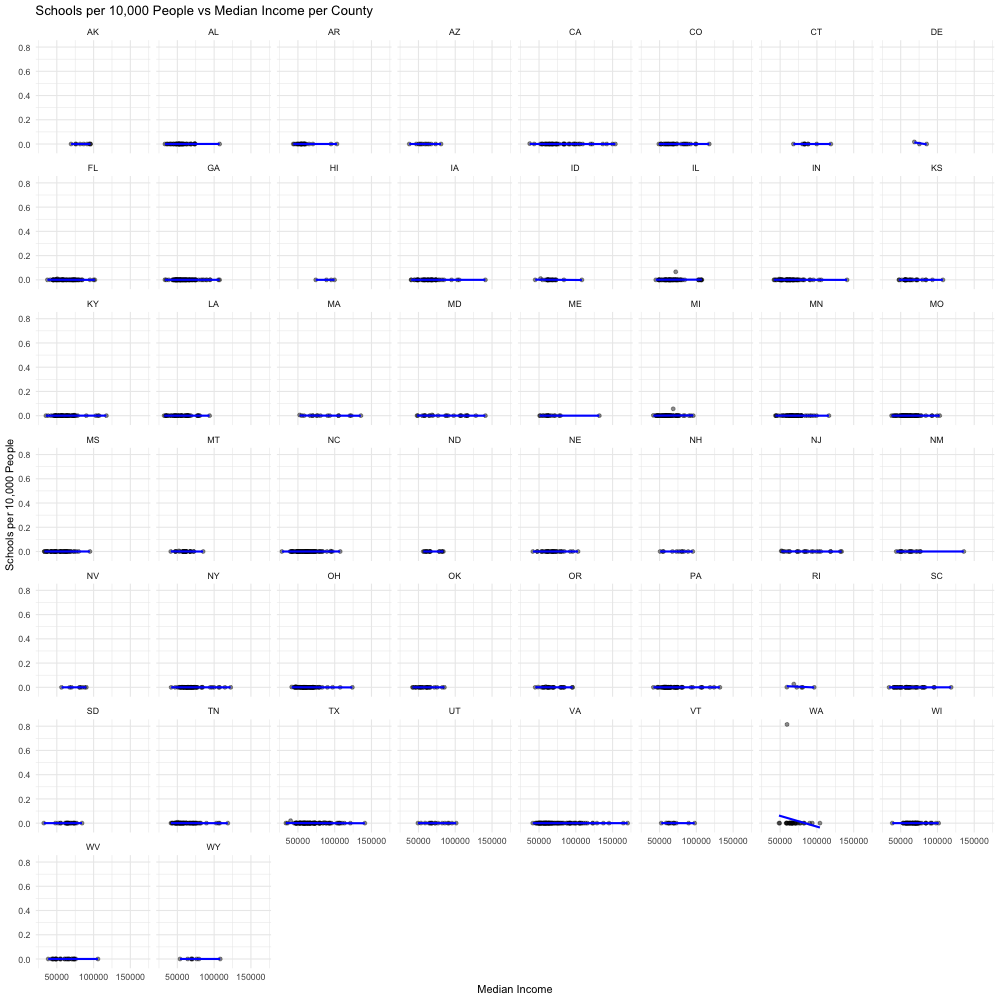

In [101]:
%%R  -w 1000 -h 1000

library(ggplot2)
 
ggplot(df, aes(x = med_incE, y = schools_per_capita)) +
  geom_point(alpha = 0.45) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  facet_wrap(~ STATE) +
  theme_minimal() +
  labs(
    title = "Schools per 10,000 People vs Median Income per County",
    x = "Median Income",
    y = "Schools per 10,000 People"
  )


## Now read and facet wrap the same. Only showing by poverty rate too. 

## regression at the top, residuals at the bottom 

In [6]:
%%R 
df_gg <- read.csv('private_school_count.csv')

In [ ]:
## most number of private schools against population 
## population density 
 #   >> geom=True 

#college town, enrolled college undergrduate/graduate sum 

`geom_smooth()` using formula = 'y ~ x'


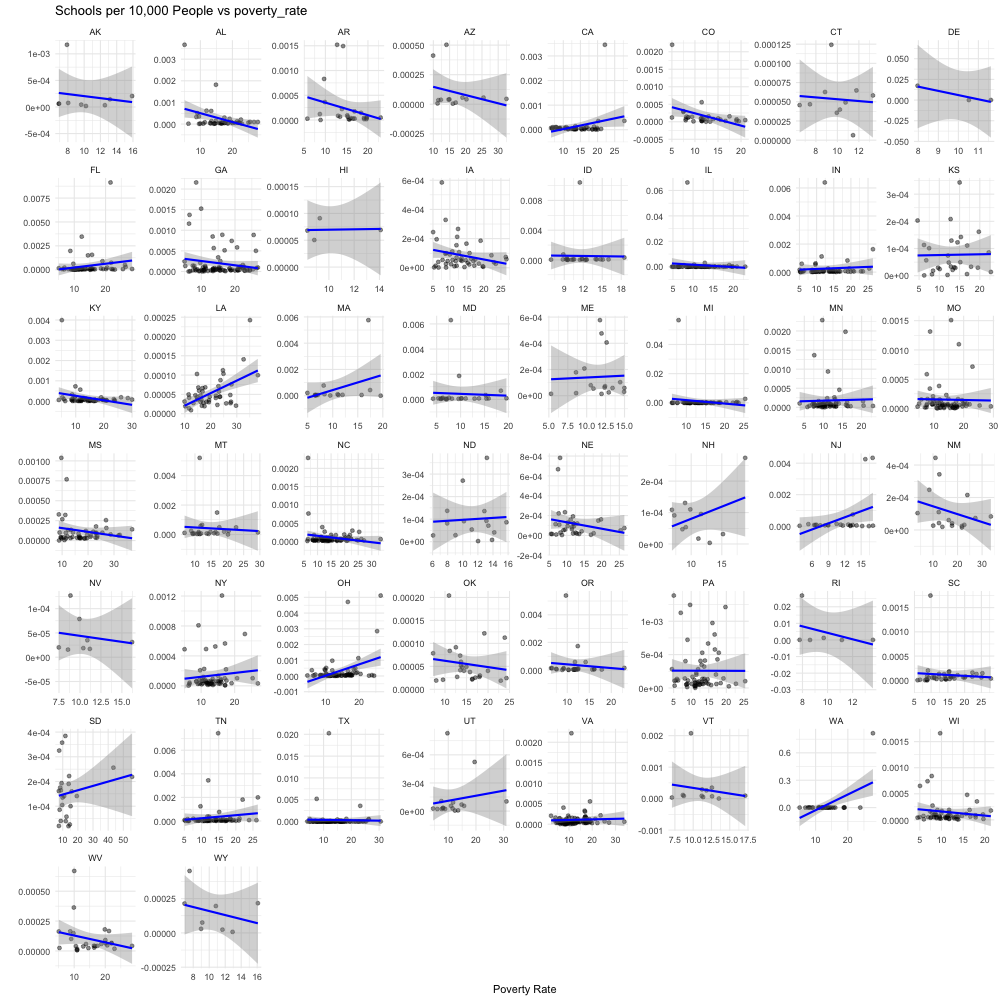

In [27]:
%%R  -w 1000 -h 1000

library(ggplot2)
library(ggrepel)
 
ggplot(df_gg, aes(x = poverty_rate, y = schools_per_capita)) +
  geom_point(alpha = 0.45) +
  geom_smooth(method = "lm", color = "blue") +
  facet_wrap(~ STATE, scales='free') +
  theme_minimal() +
  labs(
    title = "Schools per 10,000 People vs poverty_rate",
    x = "Poverty Rate",
    y = ""
  )


## Interesting. Will do multivariable regression here. 

In [37]:
%%R

model <- lm(schools_per_capita~ total_popM + med_incM , data=df_gg)
summary(model)


Call:
lm(formula = schools_per_capita ~ total_popM + med_incM, data = df_gg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14215 -0.03118 -0.01413  0.03884  0.12347 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.172e-01  5.352e-02  -4.059 0.000913 ***
total_popM  -6.468e-04  2.838e-04  -2.279 0.036735 *  
med_incM     3.286e-05  3.458e-06   9.503 5.56e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07471 on 16 degrees of freedom
  (1892 observations deleted due to missingness)
Multiple R-squared:  0.8563,	Adjusted R-squared:  0.8383 
F-statistic: 47.66 on 2 and 16 DF,  p-value: 1.82e-07



In [14]:
%%R

model <- lm(schools_per_capita~ total_popM + med_incM + whiteM + blackM + hispanicM + two_or_moreM + pacific_islanderM + poverty_incomeM + poverty_totalM , data=df_gg)
summary(model)


Call:
lm(formula = schools_per_capita ~ total_popM + med_incM + whiteM + 
    blackM + hispanicM + two_or_moreM + pacific_islanderM + poverty_incomeM + 
    poverty_totalM, data = df_gg)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09014 -0.02663 -0.00231  0.01541  0.13355 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.489e-01  8.978e-02  -2.772   0.0217 *  
total_popM        -2.248e-02  1.243e-02  -1.809   0.1039    
med_incM           3.868e-05  4.381e-06   8.829 9.99e-06 ***
whiteM            -1.115e-04  2.328e-03  -0.048   0.9629    
blackM             9.496e-04  2.251e-03   0.422   0.6830    
hispanicM          3.726e-04  1.176e-03   0.317   0.7585    
two_or_moreM      -4.622e-04  1.908e-03  -0.242   0.8140    
pacific_islanderM -7.664e-03  5.460e-03  -1.404   0.1940    
poverty_incomeM   -1.885e-04  4.594e-04  -0.410   0.6911    
poverty_totalM     2.232e-02  1.457e-02   1.532   0.1599    
---
Signif. codes:  0 

### Findings then: race of each county has less to do with it, it's income that does. 

`geom_smooth()` using formula = 'y ~ x'


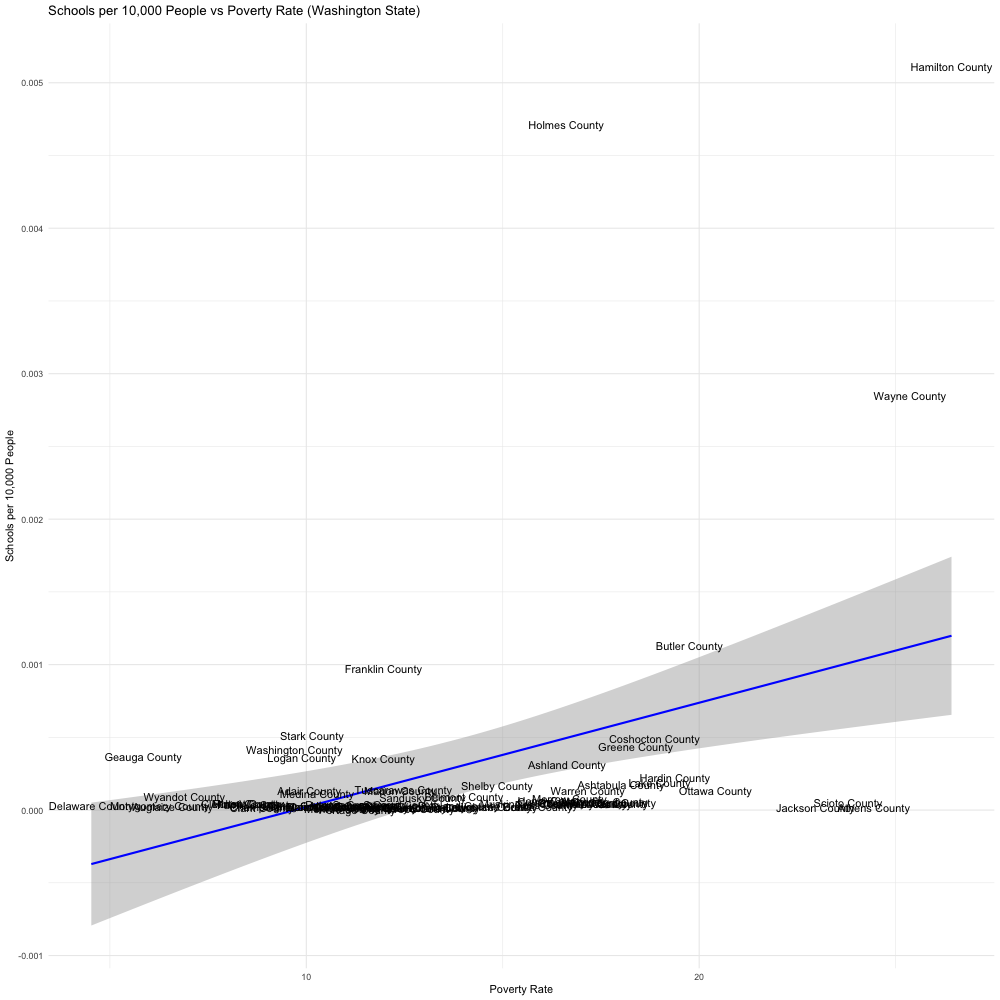

In [41]:
%%R  -w 1000 -h 1000

ggplot(df_gg[df_gg$STATE == "OH", ], aes(x = poverty_rate, y = schools_per_capita)) +
  # geom_point(alpha = 0.45) +
  geom_smooth(method = "lm", color = "blue") +
  geom_text(aes(label=County)) +
  theme_minimal() +
  labs(
    title = "Schools per 10,000 People vs Poverty Rate (Washington State)",
    x = "Poverty Rate",
    y = "Schools per 10,000 People"
  )

In [44]:
df_gg[df_gg['County']=='Hamilton County']

NameError: name 'df_gg' is not defined

In [25]:
df[df['County']=='Wayne County']

,Unnamed: 0,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
6235,6235,IN,14,18,67173,Wayne County,-87.004757,40.779363,8183,A0301442,...,NaN,4898,605,19310,56,5,0.000254,2.542459,53738.4,25.365096
6243,6243,IN,14,18,67173,Wayne County,-85.186771,40.739930,8181,A1701782,...,NaN,4898,605,19310,56,5,0.000254,2.542459,53738.4,25.365096
6259,6259,IN,14,18,67173,Wayne County,-84.902239,39.969796,8174,A0700928,...,NaN,4898,605,19310,56,5,0.000254,2.542459,53738.4,25.365096
6301,6301,IN,14,18,67173,Wayne County,-85.950641,38.621770,8169,A0301455,...,NaN,4898,605,19310,56,5,0.000254,2.542459,53738.4,25.365096
6400,6400,IN,14,18,67173,Wayne County,-84.895381,39.825000,8172,421277,...,NaN,4898,605,19310,56,5,0.000254,2.542459,53738.4,25.365096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,12570,OH,35,39,66990,Wayne County,-81.933661,40.706760,16021,A1302539,...,NaN,4898,605,19310,56,56,0.002848,28.475542,53592.0,25.365096
12571,12571,OH,35,39,66990,Wayne County,-81.860236,40.689094,16010,A1302473,...,NaN,4898,605,19310,56,56,0.002848,28.475542,53592.0,25.365096
12585,12585,OH,35,39,66990,Wayne County,-81.755461,40.728510,16008,A1302436,...,NaN,4898,605,19310,56,56,0.002848,28.475542,53592.0,25.365096
13563,13563,PA,38,42,73170,Wayne County,-75.396311,41.491360,17924,A1903667,...,NaN,4898,605,19310,56,2,0.000102,1.016984,58536.0,25.365096


## What's happening in IA? 

`geom_smooth()` using formula = 'y ~ x'


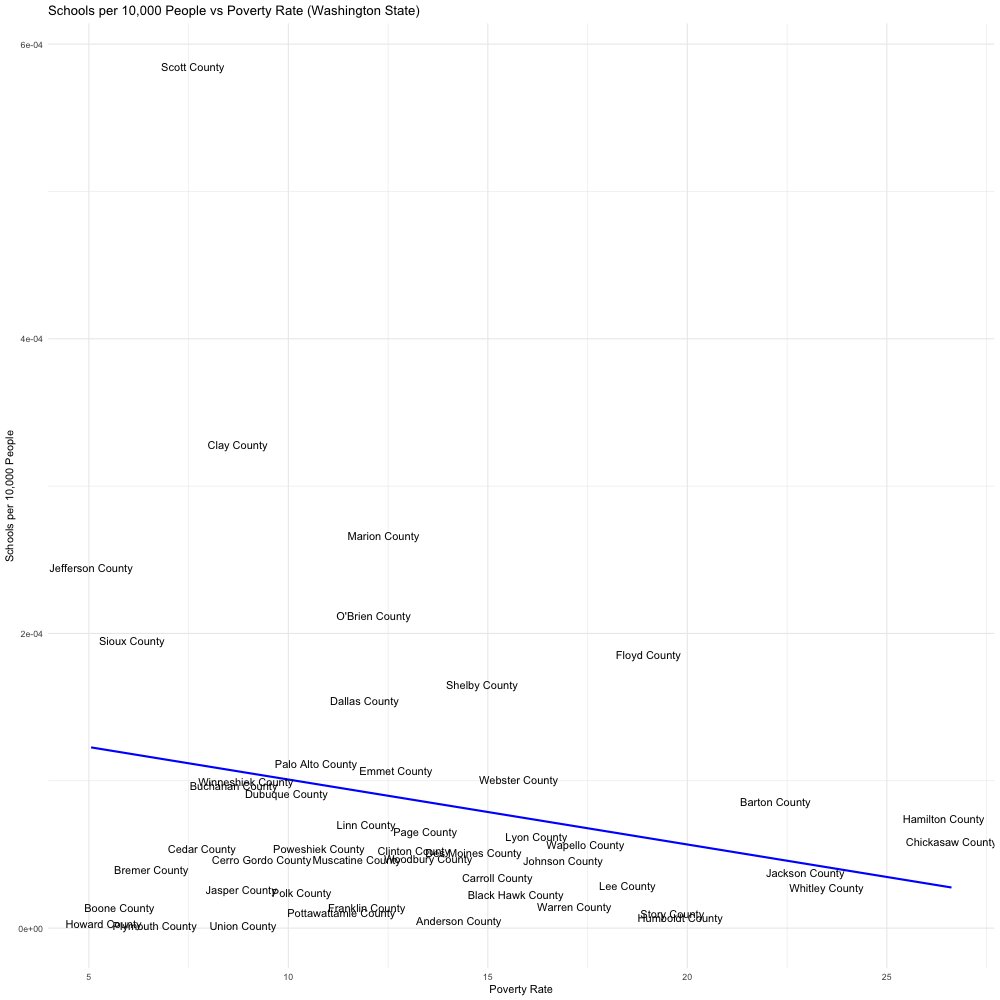

In [142]:
%%R  -w 1000 -h 1000

ggplot(df_gg[df$STATE == "IA", ], aes(x = poverty_rate, y = schools_per_capita)) +
  # geom_point(alpha = 0.45) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_text(aes(label=County)) +
  theme_minimal() +
  labs(
    title = "Schools per 10,000 People vs Poverty Rate (Washington State)",
    x = "Poverty Rate",
    y = "Schools per 10,000 People"
  )

In [144]:
df[df['County']=='Chickasaw County']

,STATE,X,GEOID.x,med_inc_state,County,OBJECTID,PPIN,NAME,STREET,CITY,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
5347,IA,15,19,70571,Chickasaw County,8206,A9103331,NORTH IOWA CHRISTIAN SCHOOL,680 6TH ST SE,MASON CITY,...,NaN,4392,622,16498,26,1,0.000059,0.587406,56456.8,26.621409


## What's happening in FL?

`geom_smooth()` using formula = 'y ~ x'


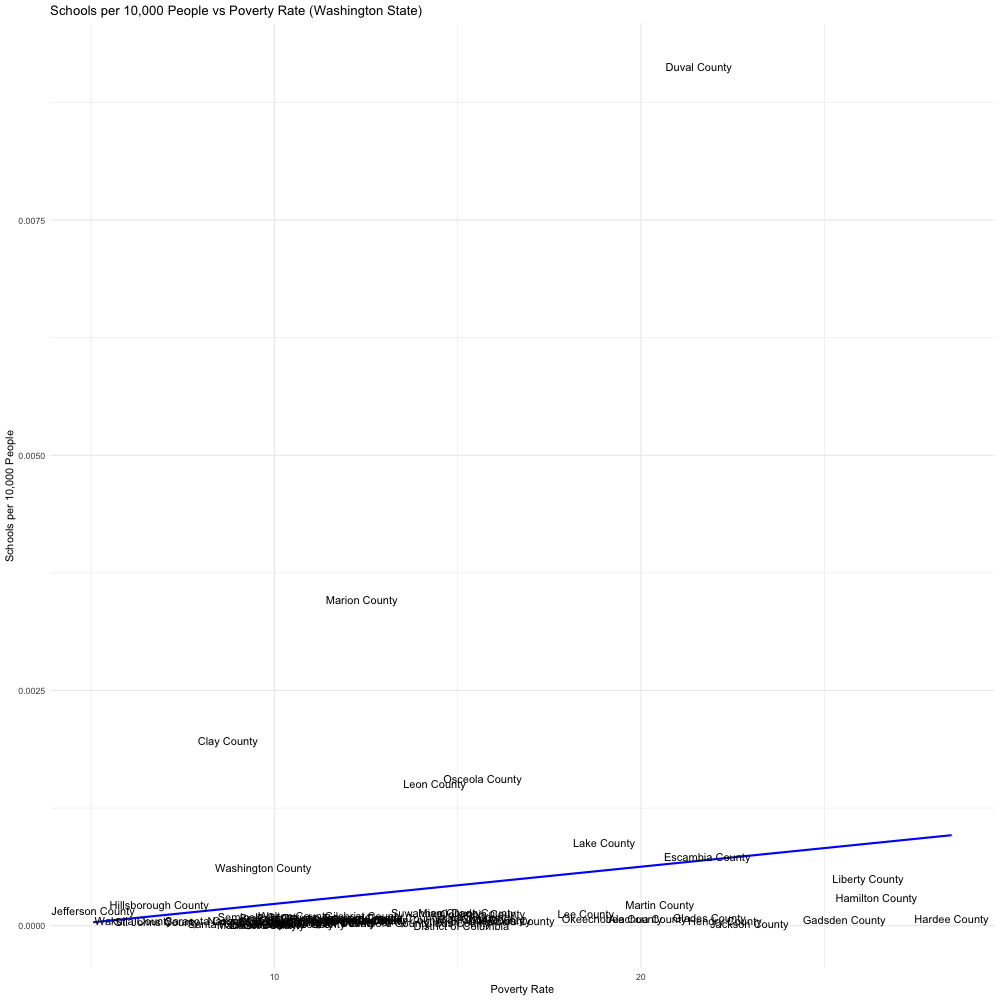

In [19]:
%%R  -w 1000 -h 1000

ggplot(df_gg[df_gg$STATE == "FL", ], aes(x = poverty_rate, y = schools_per_capita)) +
  # geom_point(alpha = 0.45) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  geom_text(aes(label=County)) +
  theme_minimal() +
  labs(
    title = "Schools per 10,000 People vs Poverty Rate (Washington State)",
    x = "Poverty Rate",
    y = "Schools per 10,000 People"
  )

In [138]:
df[df['County']=='Hardee County']

,STATE,X,GEOID.x,med_inc_state,County,OBJECTID,PPIN,NAME,STREET,CITY,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
4257,FL,9,12,67917,Hardee County,4346,A0101939,LAKESIDE NEUROLOGIC,1962 VANDOLAH RD,WAUCHULA,...,NaN,6731,1100,23639,141,2,0.000078,0.783453,54333.6,28.474132
4418,FL,9,12,67917,Hardee County,4347,A1300582,ALANE ACADEMY,316 TERRELL RD,WAUCHULA,...,NaN,6731,1100,23639,141,2,0.000078,0.783453,54333.6,28.474132


In [141]:
df[df['County']=='Hamilton County']

,STATE,X,GEOID.x,med_inc_state,County,OBJECTID,PPIN,NAME,STREET,CITY,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
3246,FL,9,12,67917,Hamilton County,4342,A0900763,ACHIEVER'S CHRISTIAN ACADEMY,1424 HAMITON AVE,JENNINGS,...,NaN,2822,435,10680,158,4,0.000296,2.964720,54333.6,26.423221
3446,FL,9,12,67917,Hamilton County,4343,A0901206,THE OAKS PRIVATE SCHOOL,7291 SW COUNTY ROAD 141,JASPER,...,NaN,2822,435,10680,158,4,0.000296,2.964720,54333.6,26.423221
3804,FL,9,12,67917,Hamilton County,4341,A2101293,SHORELINE CENTER FOR EXCEPTIONAL STUDENTS,528 CECIL G COSTIN STATE ROAD BLVD STE A,PORT ST JOE,...,NaN,2822,435,10680,158,4,0.000296,2.964720,54333.6,26.423221
4122,FL,9,12,67917,Hamilton County,4345,A9701069,JENNINGS FIRST CHRISTIAN SCHOOL,1286 GEORGIA ST,JENNINGS,...,NaN,2822,435,10680,158,4,0.000296,2.964720,54333.6,26.423221
5338,IA,15,19,70571,Hamilton County,8237,459631,TIMOTHY CHRISTIAN SCHOOL,18000 D AVE,WELLSBURG,...,NaN,2822,435,10680,158,1,0.000074,0.741180,56456.8,26.423221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14762,TN,42,47,64035,Hamilton County,18552,1297906,AVONDALE SEVENTH DAY ADVENTIST SCHOOL,1201 N ORCHARD KNOB AVE,CHATTANOOGA,...,NaN,2822,435,10680,158,27,0.002001,20.011859,51228.0,26.423221
14769,TN,42,47,64035,Hamilton County,18565,A1503628,SILVERDALE BAPTIST ACADEMY,7236 BONNY OAKS DR,CHATTANOOGA,...,NaN,2822,435,10680,158,27,0.002001,20.011859,51228.0,26.423221
14778,TN,42,47,64035,Hamilton County,18536,AA001015,MORRISTOWN COVENANT ACADEMY,503 S JACKSON ST,MORRISTOWN,...,NaN,2822,435,10680,158,27,0.002001,20.011859,51228.0,26.423221
14789,TN,42,47,64035,Hamilton County,18542,1296174,THE BRIGHT SCHOOL,1950 MCDADE LN,CHATTANOOGA,...,NaN,2822,435,10680,158,27,0.002001,20.011859,51228.0,26.423221


### Findings: Hispanic population, but white students. 

## What's going on in Utah?

`geom_smooth()` using formula = 'y ~ x'


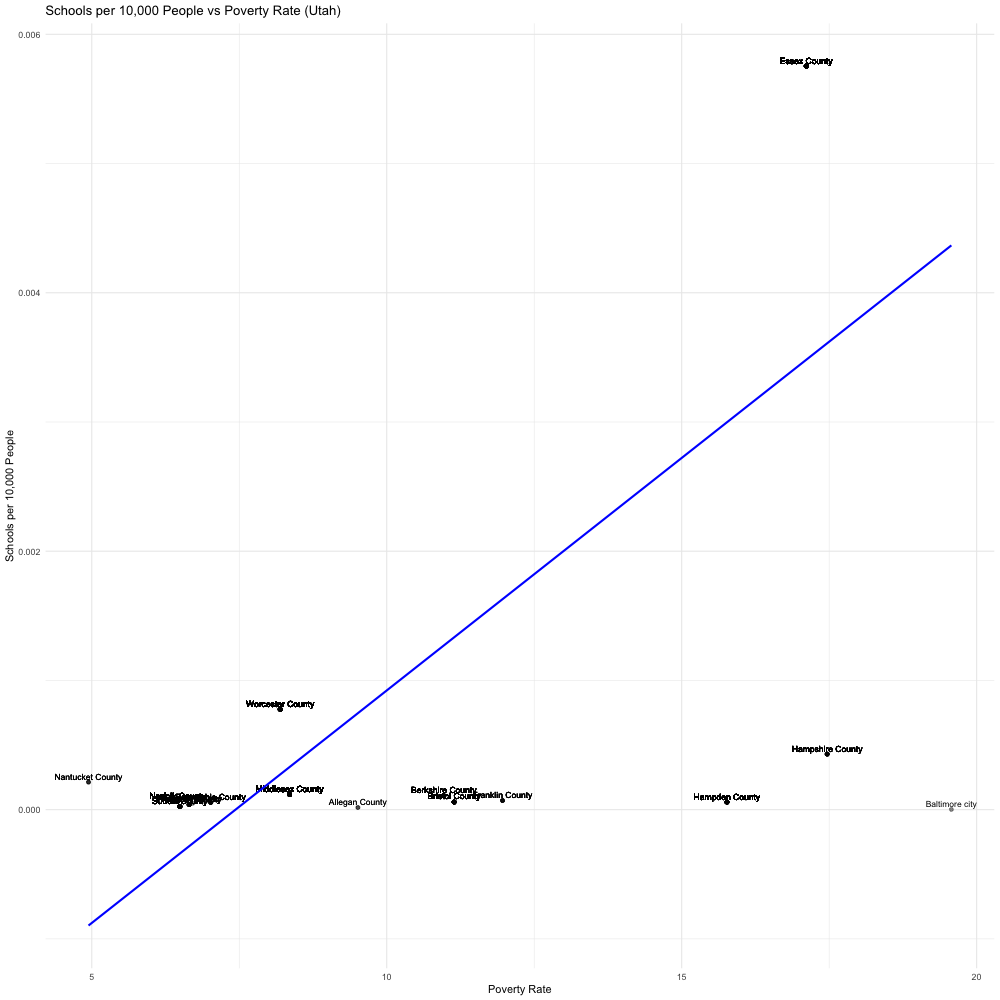

In [14]:
%%R -w 1000 -h 1000


ggplot(df[df$STATE == "MA", ], aes(x = poverty_rate, y = schools_per_capita)) +
  geom_point(alpha = 0.45) +
  geom_text(aes(label = County), vjust = -0.5, size = 3) +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  theme_minimal() +
  labs(
    title = "Schools per 10,000 People vs Poverty Rate (Utah)",
    x = "Poverty Rate",
    y = "Schools per 10,000 People"
  )


In [43]:
df[df['County']=='McKinley County']

,STATE,X,GEOID.x,med_inc_state,County,X.x,Y,OBJECTID,PPIN,NAME,...,hispanicM,poverty_incomeE,poverty_incomeM,poverty_totalE,poverty_totalM,number_of_schools,schools_per_capita,schools_per_10000,considered_low_income,poverty_rate
10656,NM,31,35,58722,McKinley County,-108.879089,35.495432,13210,A9104555,GALLUP CHRISTIAN SCHOOL,...,NaN,23950,1709,71320,182,6,0.000083,0.832489,46977.6,33.581043
10659,NM,31,35,58722,McKinley County,-108.905921,35.631017,13213,A9104642,WILDCAT CHRISTIAN ACADEMY,...,NaN,23950,1709,71320,182,6,0.000083,0.832489,46977.6,33.581043
10683,NM,31,35,58722,McKinley County,-108.222001,35.404335,13209,A9104518,ST BONAVENTURE SCHOOL,...,NaN,23950,1709,71320,182,6,0.000083,0.832489,46977.6,33.581043
10696,NM,31,35,58722,McKinley County,-108.656027,35.528610,13207,2118112,REHOBOTH CHRISTIAN SCHOOL,...,NaN,23950,1709,71320,182,6,0.000083,0.832489,46977.6,33.581043
10720,NM,31,35,58722,McKinley County,-108.852151,35.072110,13208,A1902946,ST ANTHONY INDIAN SCHOOL,...,NaN,23950,1709,71320,182,6,0.000083,0.832489,46977.6,33.581043
10730,NM,31,35,58722,McKinley County,-106.305317,35.884354,13204,909514,CANYONCITO MONTESSORI SCHOOL,...,NaN,23950,1709,71320,182,6,0.000083,0.832489,46977.6,33.581043


## Merge dataset on religion with private schools

In [28]:
import pandas as pd
df=pd.read_csv('race.csv')
df

,PFNLWT,REPW1,REPW2,REPW3,REPW4,REPW5,REPW6,REPW7,REPW8,REPW9,...,S1_F_P610,S1_F_P620,S1_F_P622,S1_F_P630,S1_F_P635,S1_F_P640,S1_F_P645,S1_F_P650,S1_F_P655,S1_F_P660
0,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,1.050000,...,0,0,0,0,0,0,0,0,0,0
1,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,1.227273,...,0,0,0,0,0,0,0,0,0,0
2,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,1.231884,...,0,0,0,0,0,0,0,0,0,0
3,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,1.155844,...,0,0,0,0,0,0,0,0,0,0
4,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,1.176471,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22340,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,...,0,0,0,0,0,0,0,0,0,0
22341,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,1.498105,...,0,0,0,0,0,0,0,0,0,0
22342,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,1.383178,...,0,0,0,0,0,0,0,0,0,0
22343,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,1.294118,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['PINST']['PADDRS']['RELIG']['P_ASIAN']['P_PACIFIC'] ['P_HISP']['P_WHITE']['P_BLACK']['PSTABB']